# **<span><center> Business requirement<center></span>**
Dataset: `loan_status_2007_2014`
- Sử dụng các phương pháp data mining để tiền xử lý dữ liệu
- Đưa ra insights từ các performance metrics và visualize dữ liệu
- Sử dụng bộ dữ liệu về khoản vay để dự đoán khả năng vỡ nợ của khách hàng

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 4000
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision=5)

import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv(r'E:\learn st new\Credit score\Scorecard\loan_data_2007_2014.csv', low_memory= False, index_col=0 )
df.shape

(466285, 74)

## **<span style="color:#CCFFFF;">Xử lý biến Target</span>**
- Những giao dịch `Current` và giao dịch `In Grace Period` sẽ loại bỏ

In [31]:
df =  df[(df.loan_status != 'In Grace Period') & (df.loan_status != 'Current')]

In [32]:
#kiểm tra lại
df.loan_status.value_counts()

Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [33]:
non_default = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
df['loan_status'] = np.where(df['loan_status'].isin(non_default), 0, 1)

100*df.loan_status.value_counts()/df.shape[0]

0   78.157
1   21.843
Name: loan_status, dtype: float64

[Text(0, 0, '186727'), Text(0, 0, '52186')]

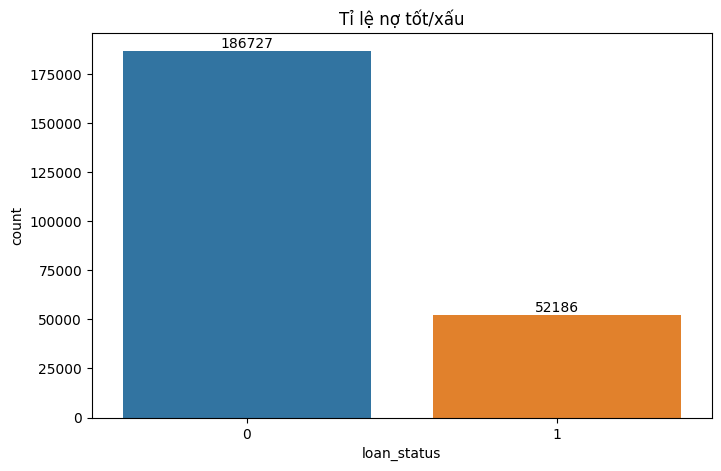

In [34]:
# Biểu đồ so sánh số lượng nợ 
plt.subplots(figsize=(8,5))
plt.title('Tỉ lệ nợ tốt/xấu')
a = sns.countplot(x = df.loan_status)
a.bar_label(a.containers[0])

## **<span style="color:#CCFFFF;">Xử lý dữ liệu khuyết thiếu</span>**
* Đối với những dữ liệu `khuyết thiếu trên 70%`, loại bỏ ra khỏi bộ dữ liệu
* Đối với những dữ liệu category có `số lượng lớn và chứa khuyết thiếu`, nên loại ra khỏi mô hình
* Đối với những dữ liệu có `khuyết thiếu thấp`, nên xử lí nhanh bằng cách loại bỏ các dòng
* Đối với những dữ liệu `chỉ có 1 loại`, đưa ra khỏi mô hình
* Có 3 cột có dữ liệu khuyết thiếu giống nhau, do dữ liệu `tập trung` về 1 phía nên loại

In [35]:
# Dữ liệu memberid và id trùng nhau và không có ý nghĩa trong mô hình, nên bỏ khỏi Dataset
df = df.drop(columns = ['member_id', 'id'])

In [36]:
# Kiểm tra khuyết thiếu
pct_missing_value = 100* df.isnull().sum()/df.shape[0]
pct_missing_value.head(10)

loan_amnt         0.000
funded_amnt       0.000
funded_amnt_inv   0.000
term              0.000
int_rate          0.000
installment       0.000
grade             0.000
sub_grade         0.000
emp_title         5.641
emp_length        3.861
dtype: float64

In [37]:
df.emp_title.value_counts().shape[0],df.title.value_counts().shape[0],df.sub_grade.value_counts().shape[0]

(129889, 49930, 35)

In [38]:
# Xử lý các biến định tính
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)

for col in cat_col:
    print(col)
    print(df[col].unique())

term
[' 36 months' ' 60 months']
grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade
['B2' 'C4' 'C5' 'C1' 'A4' 'E1' 'F2' 'B5' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']
emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']
emp_length
['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years' nan]
home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status
['Verified' 'Source Verified' 'Not Verified']
issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oc

In [39]:
df = df.drop(columns = [x for x in pct_missing_value[pct_missing_value >= 70].index])

In [40]:
df = df.drop(columns = ['emp_title','sub_grade','title','addr_state','desc'])

In [41]:
df = df.dropna(subset = ['annual_inc','delinq_2yrs','earliest_cr_line','inq_last_6mths','revol_util',
                         'last_pymnt_d','collections_12_mths_ex_med','acc_now_delinq','last_credit_pull_d'])

In [42]:
df = df.drop(columns = ['policy_code','url', 'zip_code','application_type'])

In [43]:
# số lượng null khá lớn, chiếm trên khoảng 28%
df[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,171899.000,171899.000,171899.000
mean,200.820,136581.484,29118.968
std,22134.785,150119.007,28537.528
min,0.000,0.000,100.000
25%,0.000,27976.500,13200.000
50%,0.000,79293.000,22000.000
75%,0.000,206441.500,36200.000
max,9152545.000,8000078.000,2013133.000


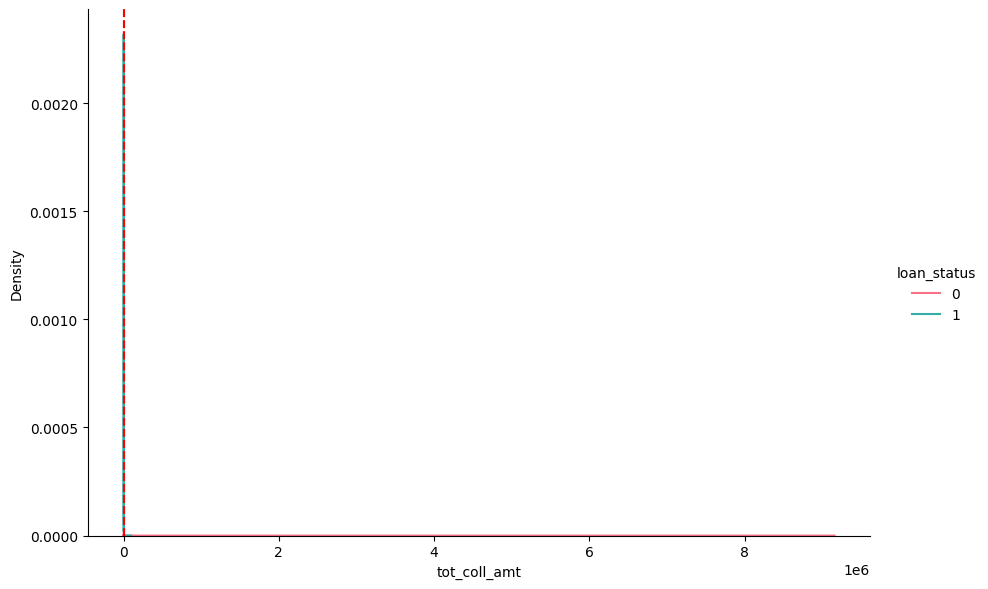

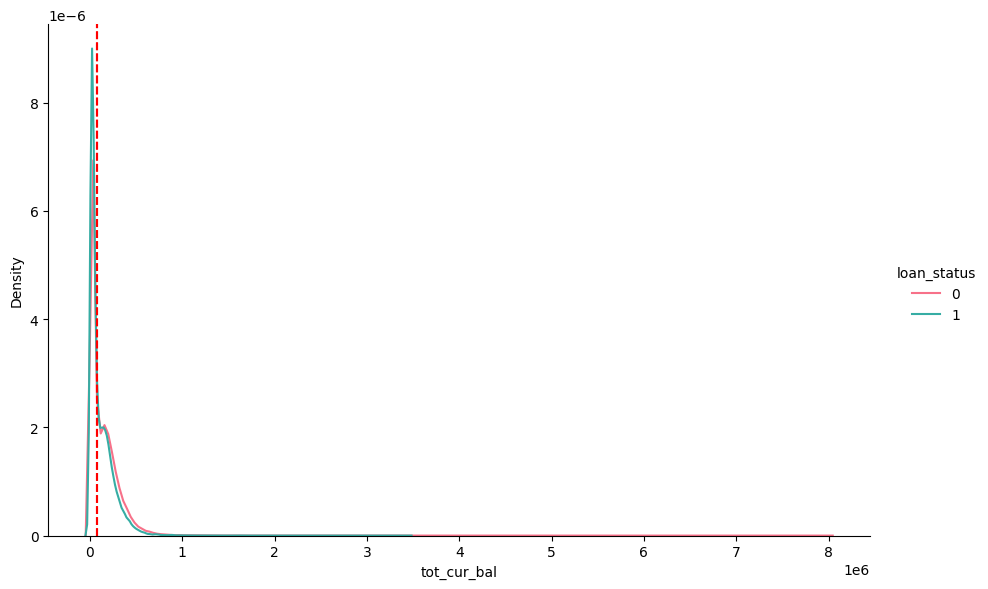

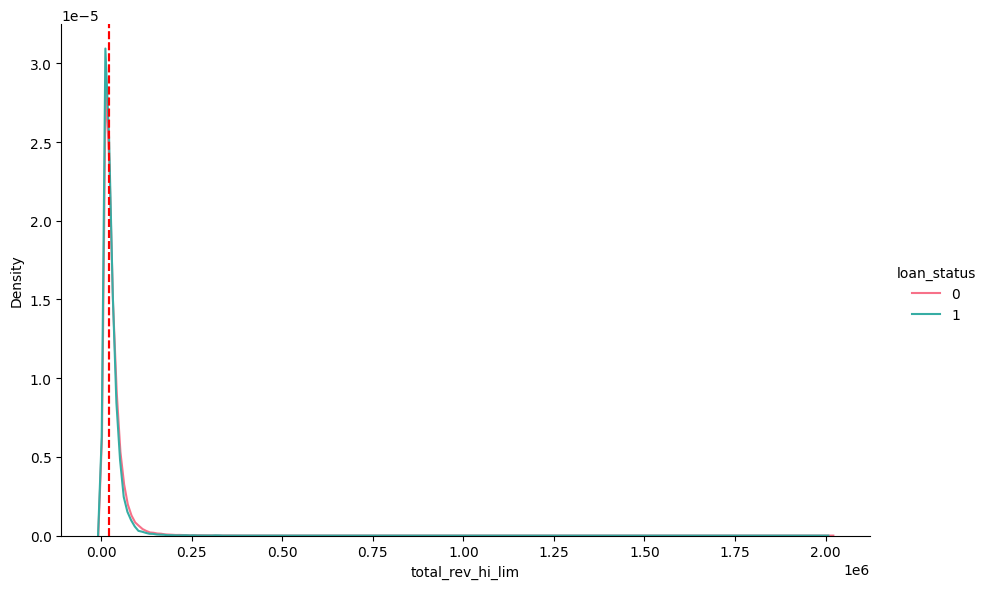

In [44]:
# Đồ thị minh họa 3 cột dữ liệu
g= sns.FacetGrid(df, hue='loan_status',height = 6,aspect = 1.5, palette = 'husl')
g.map(sns.kdeplot, 'tot_coll_amt', shade = False).add_legend()
g.refline(x = df.tot_coll_amt.median(), color = 'r')

g= sns.FacetGrid(df, hue='loan_status',height = 6,aspect = 1.5,palette = 'husl')
g.map(sns.kdeplot, 'tot_cur_bal', shade = False).add_legend()
g.refline(x = df.tot_cur_bal.median(), color = 'r')

g= sns.FacetGrid(df, hue='loan_status',height = 6,aspect = 1.5,palette = 'husl')
g.map(sns.kdeplot, 'total_rev_hi_lim', shade = False).add_legend()
g.refline(x = df.total_rev_hi_lim.median(), color = 'r')

pass

In [45]:
df = df.drop(columns = ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim'])

In [46]:
df[['mths_since_last_delinq','last_pymnt_d','delinq_2yrs']].head()

,mths_since_last_delinq,last_pymnt_d,delinq_2yrs
0,NaN,Jan-15,0.000
1,NaN,Apr-13,0.000
2,NaN,Jun-14,0.000
3,35.000,Jan-15,0.000
5,NaN,Jan-15,0.000


In [47]:
df[['mths_since_last_delinq','last_pymnt_d','delinq_2yrs']][df['mths_since_last_delinq'].isna()].describe()

,mths_since_last_delinq,delinq_2yrs
count,0.000,133155.000
mean,NaN,0.004
std,NaN,0.133
min,NaN,0.000
25%,NaN,0.000
50%,NaN,0.000
75%,NaN,0.000
max,NaN,14.000


In [48]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].replace(np.nan, 0)

## **<span style="color:#CCFFFF;">Biến đổi các dữ liệu đầu vào</span>**

- Format lại các dữ liệu `ngày tháng`

In [49]:
df.issue_d = pd.to_datetime(df.issue_d, format ='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format ='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d,format ='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format = '%b-%y')

In [50]:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)

num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] != 'object':
        num_col.append(x)



Số biến demographic:  8


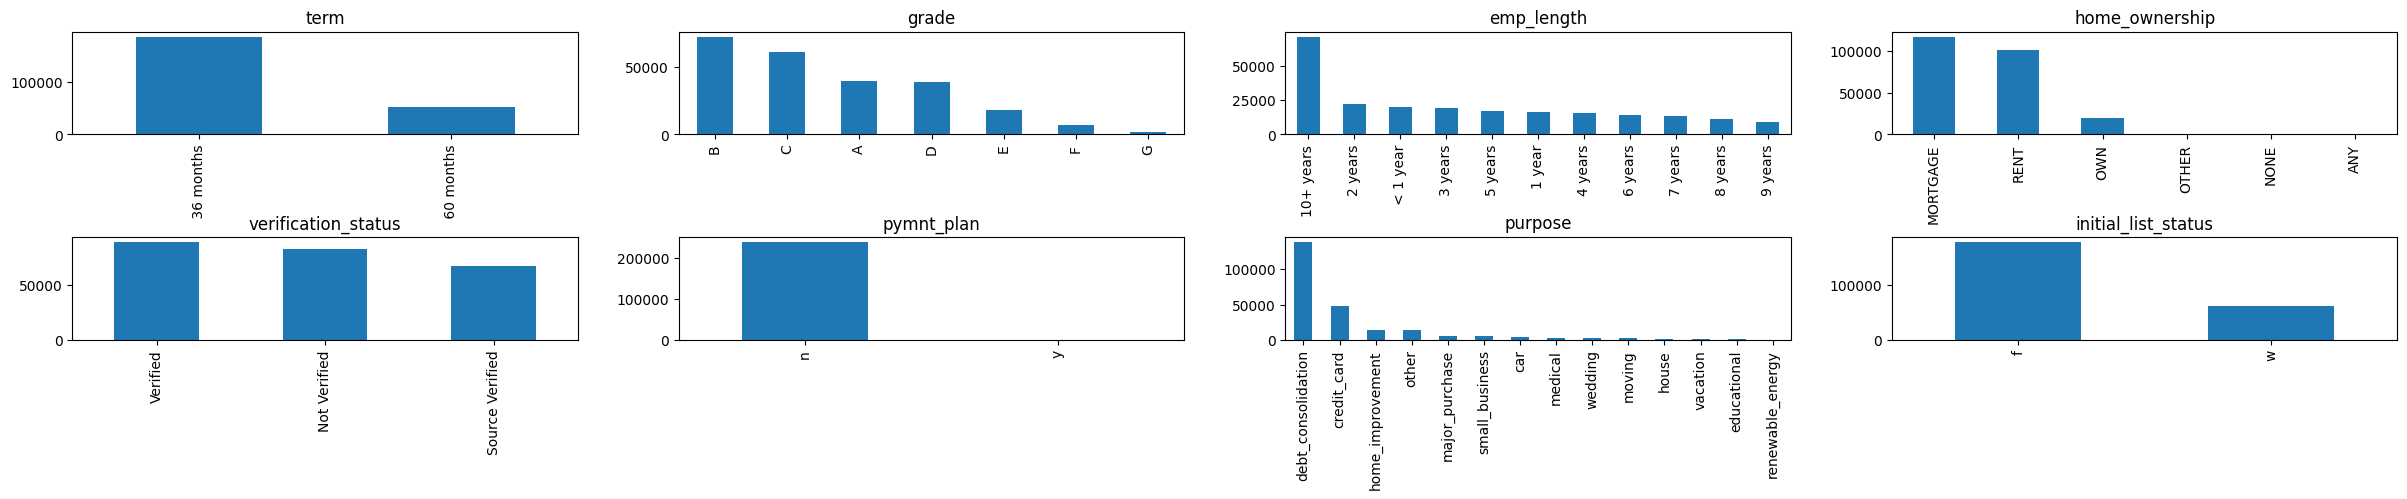

In [51]:
def plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def distribution_cate(df, cat_col, row = 8, col = 4, figsize = (30, 20)):
  print('Số biến demographic: ', len(cat_col))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=1)    
  for i in range(1, len(cat_col)+1):
    try:
      plt.subplot(row, col, i)
      plot_bar_classes(df, cat_col[i-1])
      plt.title(cat_col[i-1])
    except:
      break

distribution_cate(df, cat_col)

- `pymnt_plan` có số lượng y rất ít, nên bỏ cột này ra khỏi mô hình
- `home_ownership` có 3 nhóm có số lượng thấp, nên nhóm cùng loại `Rent`

In [52]:
df = df[df['pymnt_plan'] != 'y' ]
df = df.drop(columns = 'pymnt_plan')

In [53]:
df.home_ownership = df.home_ownership.replace('OTHER', 'RENT')
df.home_ownership = df.home_ownership.replace('NONE', 'RENT')
df.home_ownership = df.home_ownership.replace('ANY', 'RENT' )

In [54]:
df.emp_length = df.emp_length.str.replace('\+ years', '')
df.emp_length = df.emp_length.str.replace('\< 1 year', str(0))
df.emp_length = df.emp_length.replace(np.nan, str(0))
df.emp_length = df.emp_length.str.replace(' year', '')
df.emp_length = df.emp_length.str.replace(' years', '')
df.emp_length = df.emp_length.str.replace('s', '')
# Chuyển dữ liệu sang dạng số
df.emp_length = pd.to_numeric(df.emp_length)

Số biến định lượng:  32


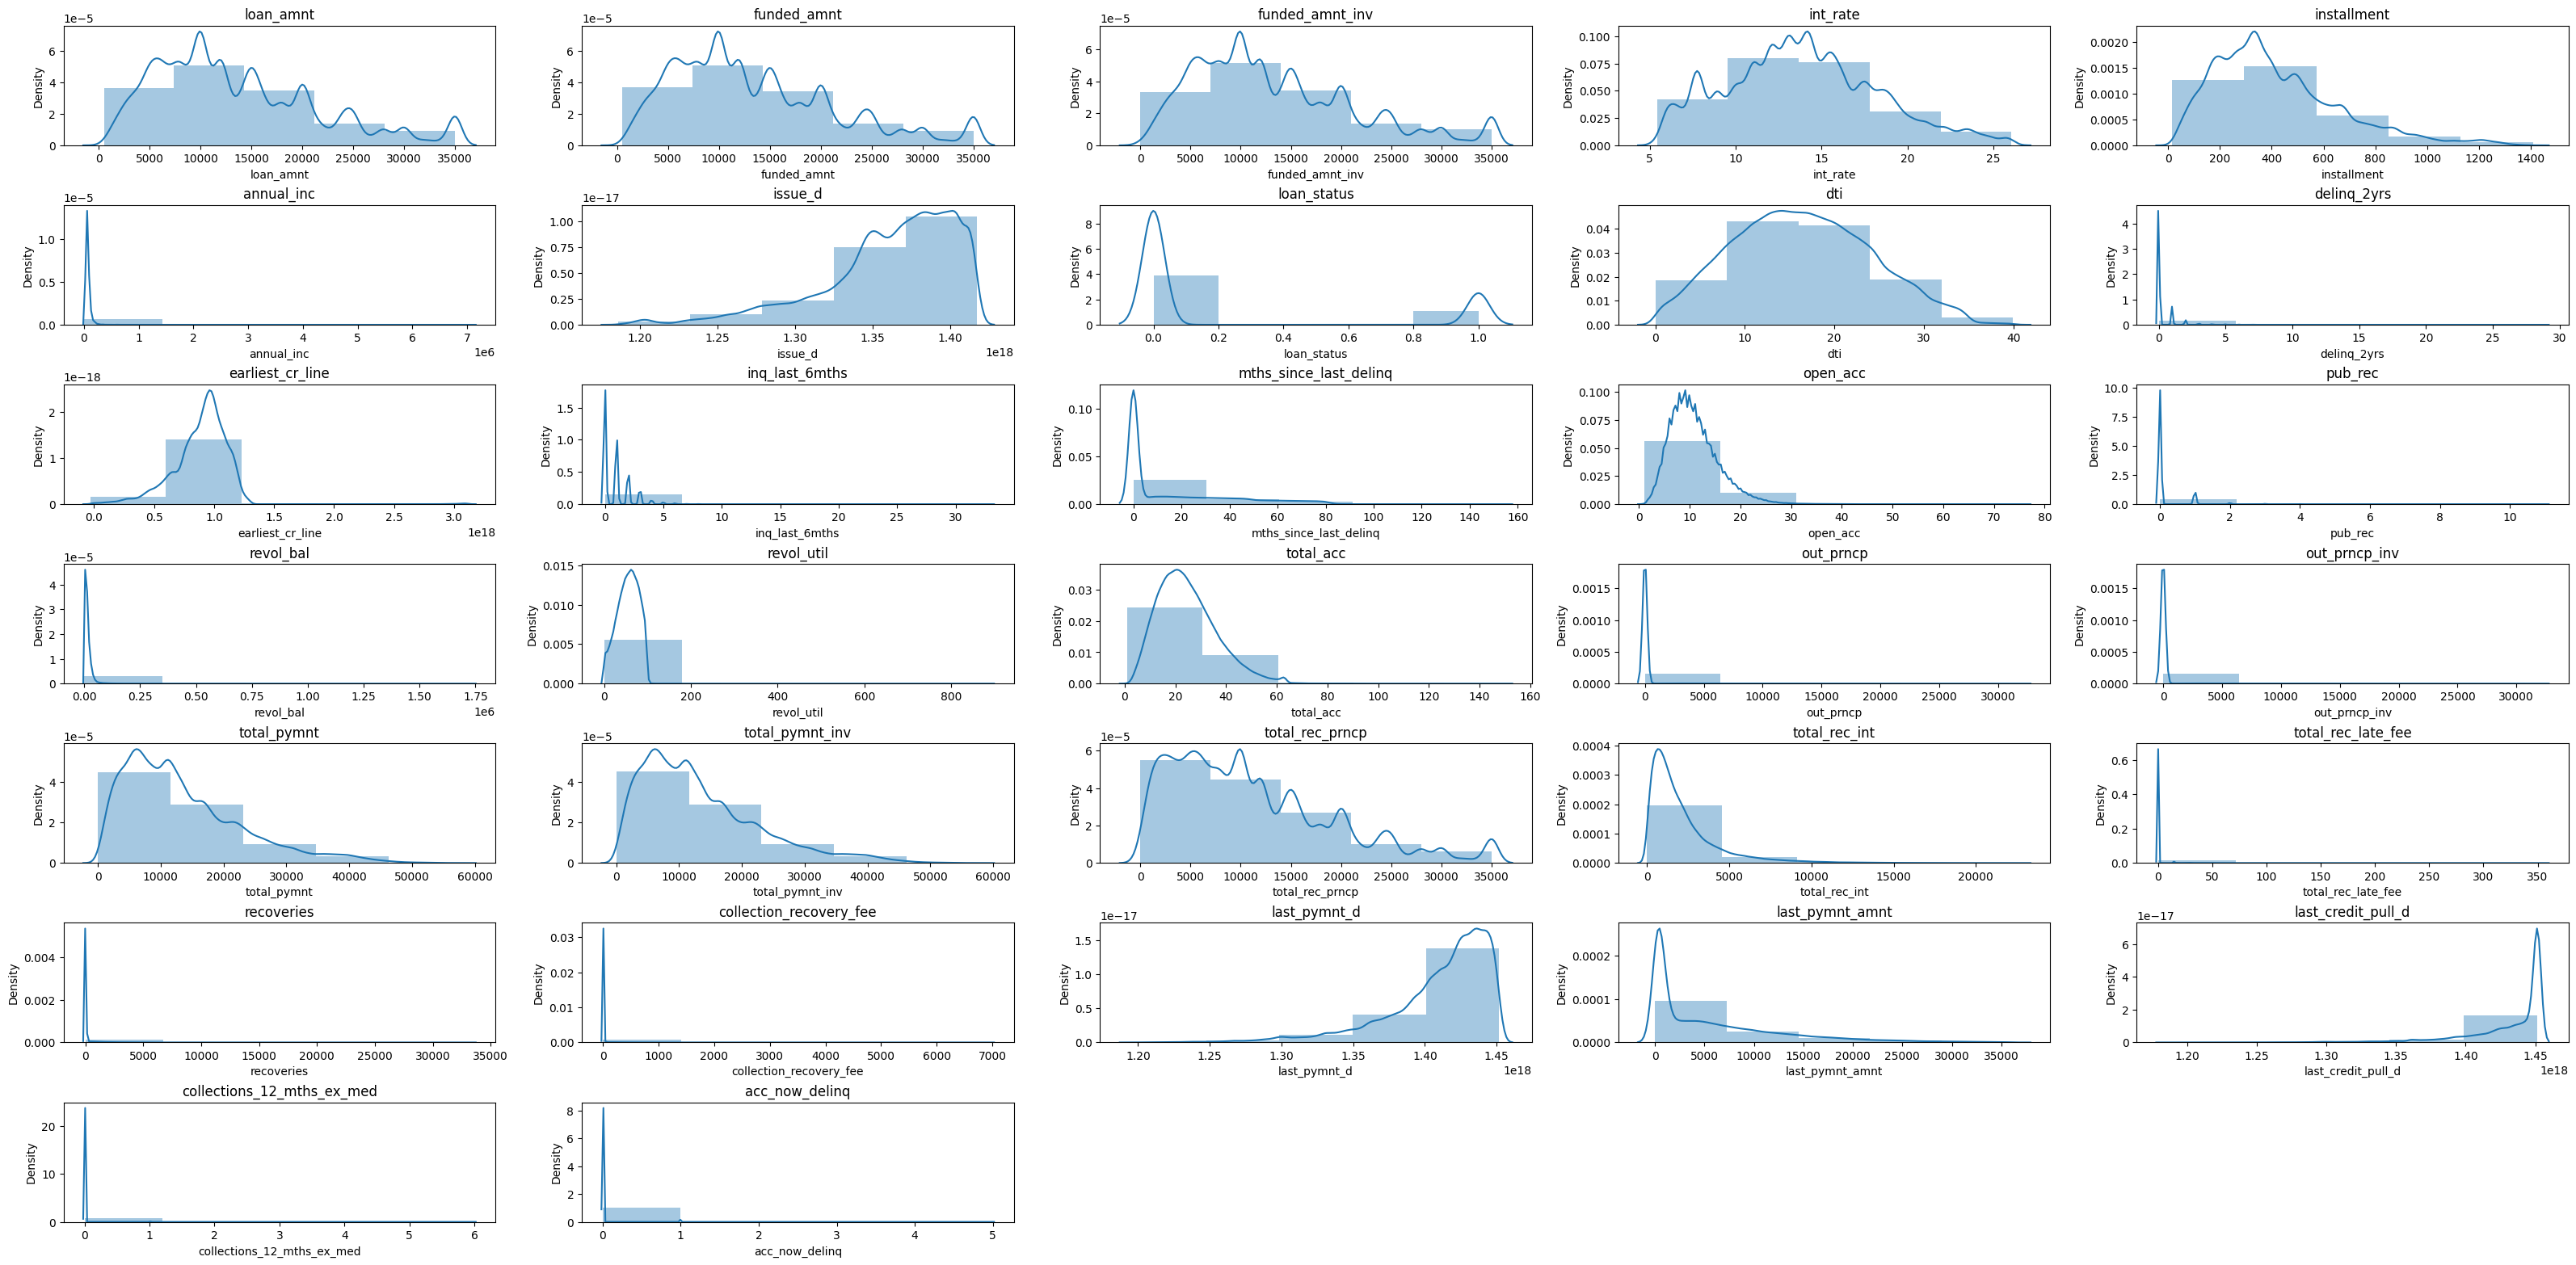

In [55]:
# Mô tả biến định lượng

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def distribution_numeric(df, numeric_cols, row= 9, col=5, figsize=(40, 25), bins = 5):
    print('Số biến định lượng: ', len(numeric_cols))
    #assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

distribution_numeric(df, num_col)

- Các biến có `Q3 =0` nên loại ra khỏi mô hình
- Tỉ lệ xoay vòng vốn có giá trị lớn `bất thường`, những giá trị >100 sẽ thay thế =100
- 3 biến đầu tiên về khoản vay có phân phối `giống nhau` và giá trị khá `tương đồng`, tức là gần như người đi vay sẽ nhận được khoản vay mà họ đã apply, nên loại ra khỏi mô hình 2 trong 3 biến

In [56]:
df[['revol_bal', 'mths_since_last_delinq', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_rec_late_fee', 'collection_recovery_fee', 'annual_inc']].describe()

,revol_bal,mths_since_last_delinq,out_prncp,out_prncp_inv,recoveries,total_rec_late_fee,collection_recovery_fee,annual_inc
count,238170.000,238170.000,238170.000,238170.000,238170.000,238170.000,238170.000,238170.000
mean,15235.198,15.410,375.655,375.527,165.314,0.936,17.384,71936.471
std,19168.970,22.609,2331.120,2330.415,759.954,6.326,118.337,55084.276
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1896.000
25%,5931.000,0.000,0.000,0.000,0.000,0.000,0.000,45000.000
50%,11004.000,0.000,0.000,0.000,0.000,0.000,0.000,61500.000
75%,19084.000,28.000,0.000,0.000,0.000,0.000,0.000,86000.000
max,1746716.000,152.000,32160.380,32160.380,33520.270,358.680,7002.190,7141778.000


In [57]:
df = df.drop(columns =['out_prncp_inv', 'recoveries', 'total_rec_late_fee','collection_recovery_fee' ])

In [58]:
df = df.drop(columns =['funded_amnt','funded_amnt_inv'])

In [59]:
df.revol_util.describe()

count   238170.000
mean        55.006
std         24.665
min          0.000
25%         37.300
50%         56.700
75%         74.500
max        892.300
Name: revol_util, dtype: float64

In [60]:
df = df.reset_index()

In [61]:
for i in range(0, len(df)):
    if df['revol_util'][i] >= 100 :
        df['revol_util'] = df['revol_util'].replace(df['revol_util'][i], 100)      

## **<span style = 'color: #CCFFFF;'> Thêm các biến để phục vụ EDA </span>**

In [62]:
# %delinquency trong vòng 2 năm (Behaviourial Risk)
df['delinq_pct'] = 100* df['delinq_2yrs']/df['mths_since_last_delinq']
df['delinq_pct']= df['delinq_pct'].replace(np.nan, 0)
df['delinq_pct']= df['delinq_pct'].replace(np.inf, 100)

In [63]:
# Thời gian tính từ lần đầu hạn mức tín dụng được đặt và tg tính từ lần đầu khoản vay được được đặt
df['loan_issue_m'] = pd.to_datetime('2015-12-31') - df['issue_d']
df['loan_issue_m'] = df['loan_issue_m'].astype('timedelta64[M]')

df['cr_line_issue_m'] = pd.to_datetime('2015-12-31') - df['earliest_cr_line']
df['cr_line_issue_m'] =  df['cr_line_issue_m'].astype('timedelta64[M]')


In [64]:
#những tín dụng có số ngày được mở âm 
df.loc[:, ['earliest_cr_line','cr_line_issue_m']][df.cr_line_issue_m< 0].head()

,earliest_cr_line,cr_line_issue_m
1420,2062-09-01,-561.000
1592,2068-09-01,-633.000
2515,2064-09-01,-585.000
2942,2067-09-01,-621.000
3010,2065-02-01,-590.000


In [65]:
# Loại những tín dụng có thời gian giao dịch sau 2015
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year
df = df[df['earliest_cr_year'] < 2016]


In [66]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype('int64')

In [67]:
df.head()

,index,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,delinq_pct,loan_issue_m,cr_line_issue_m,earliest_cr_year
0,0,5000,36,10.650,162.870,B,10,RENT,24000.000,Verified,2011-12-01,0,credit_card,27.650,0.000,1985-01-01,1.000,0.000,3.000,0.000,13648,83.700,9.000,f,0.000,5861.071,5831.780,5000.000,861.070,2015-01-01,171.620,2016-01-01,0.000,0.000,0.000,48.000,371.000,1985
1,1,2500,60,15.270,59.830,C,0,RENT,30000.000,Source Verified,2011-12-01,1,car,1.000,0.000,1999-04-01,5.000,0.000,3.000,0.000,1687,9.400,4.000,f,0.000,1008.710,1008.710,456.460,435.170,2013-04-01,119.660,2013-09-01,0.000,0.000,0.000,48.000,201.000,1999
2,2,2400,36,15.960,84.330,C,10,RENT,12252.000,Not Verified,2011-12-01,0,small_business,8.720,0.000,2001-11-01,2.000,0.000,2.000,0.000,2956,98.500,10.000,f,0.000,3003.654,3003.650,2400.000,603.650,2014-06-01,649.910,2016-01-01,0.000,0.000,0.000,48.000,169.000,2001
3,3,10000,36,13.490,339.310,C,10,RENT,49200.000,Source Verified,2011-12-01,0,other,20.000,0.000,1996-02-01,1.000,35.000,10.000,0.000,5598,21.000,37.000,f,0.000,12226.302,12226.300,10000.000,2209.330,2015-01-01,357.480,2015-01-01,0.000,0.000,0.000,48.000,238.000,1996
4,5,5000,36,7.900,156.460,A,3,RENT,36000.000,Source Verified,2011-12-01,0,wedding,11.200,0.000,2004-11-01,3.000,0.000,9.000,0.000,7963,28.300,12.000,f,0.000,5631.378,5631.380,5000.000,631.380,2015-01-01,161.030,2015-09-01,0.000,0.000,0.000,48.000,133.000,2004


## **<span style = 'color: #CCFFFF;'> Phân tích khoản vay </span>**

## **<span style = 'color: #CCFFFF;'> Correlation </span>**
- Loại những biến có `tương quan cao`

In [68]:
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        num_col.append(i)

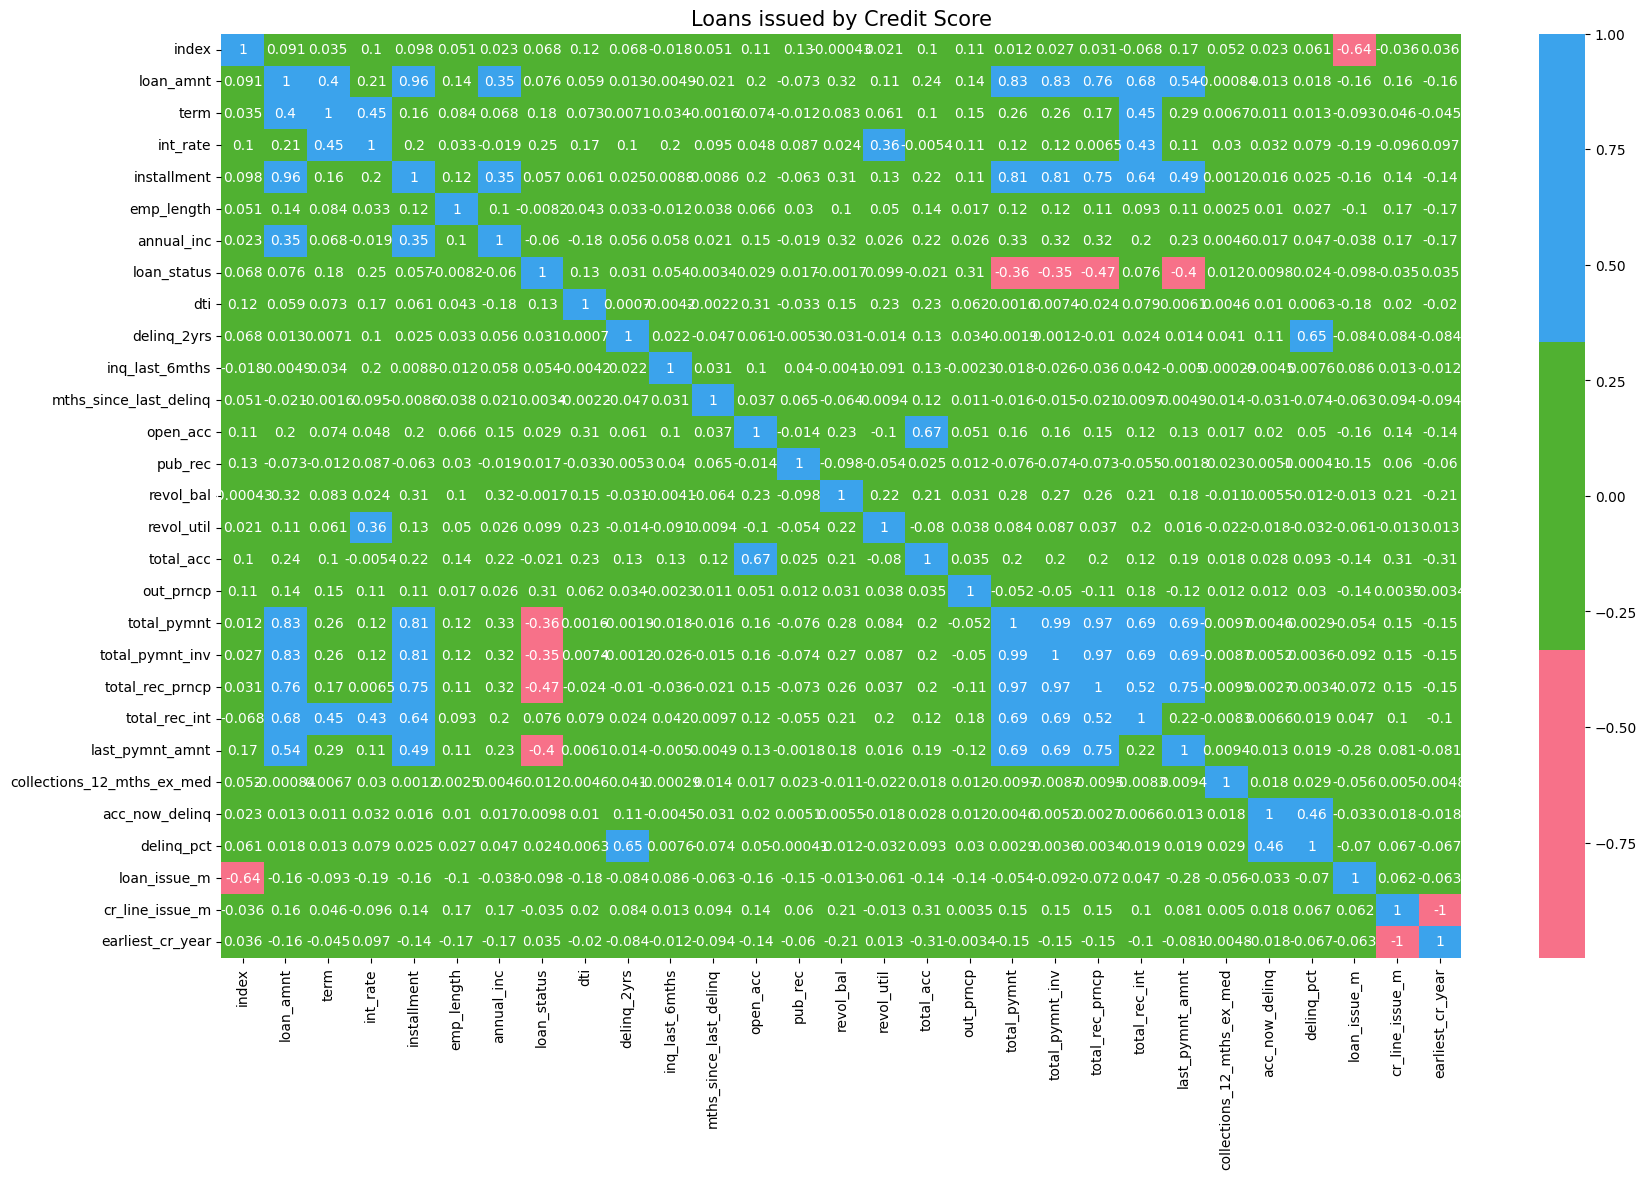

In [69]:
# Biểu đồ ma trận tương quan
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot()
sns.heatmap(data = df[num_col].corr(method = 'pearson'), annot = True, cmap=sns.color_palette("husl", 3))
ax.set_title('Loans issued by Credit Score', fontsize= 15)
pass

In [70]:
df = df.drop(columns = ['installment','total_pymnt_inv', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'earliest_cr_year'])

## **<span style = 'color: #CCFFFF;'> EDA </span>**

### <span style = 'color: #F9E2AF;'>Phân tích về khoản vay và thu nhập </span>

In [71]:
df.loan_amnt.describe()

count   237653.000
mean     13495.096
std       8061.988
min        500.000
25%       7200.000
50%      12000.000
75%      18000.000
max      35000.000
Name: loan_amnt, dtype: float64

Text(0.5, 1.0, 'Phân phối giá trị')

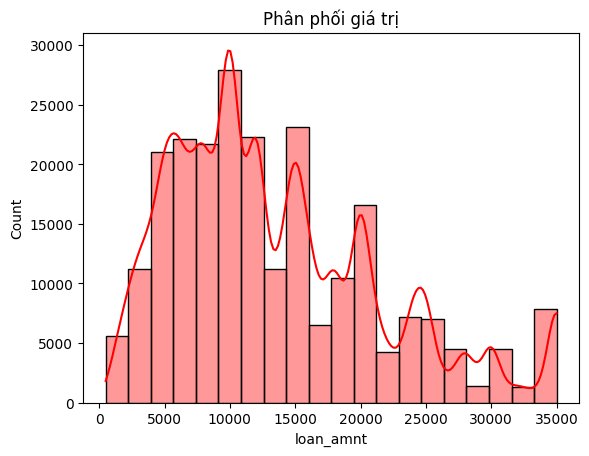

In [72]:
sns.histplot(data = df , x = 'loan_amnt',bins = 20, kde = True, alpha = 0.4, color = 'r')
plt.title('Phân phối giá trị', fontsize= 12)

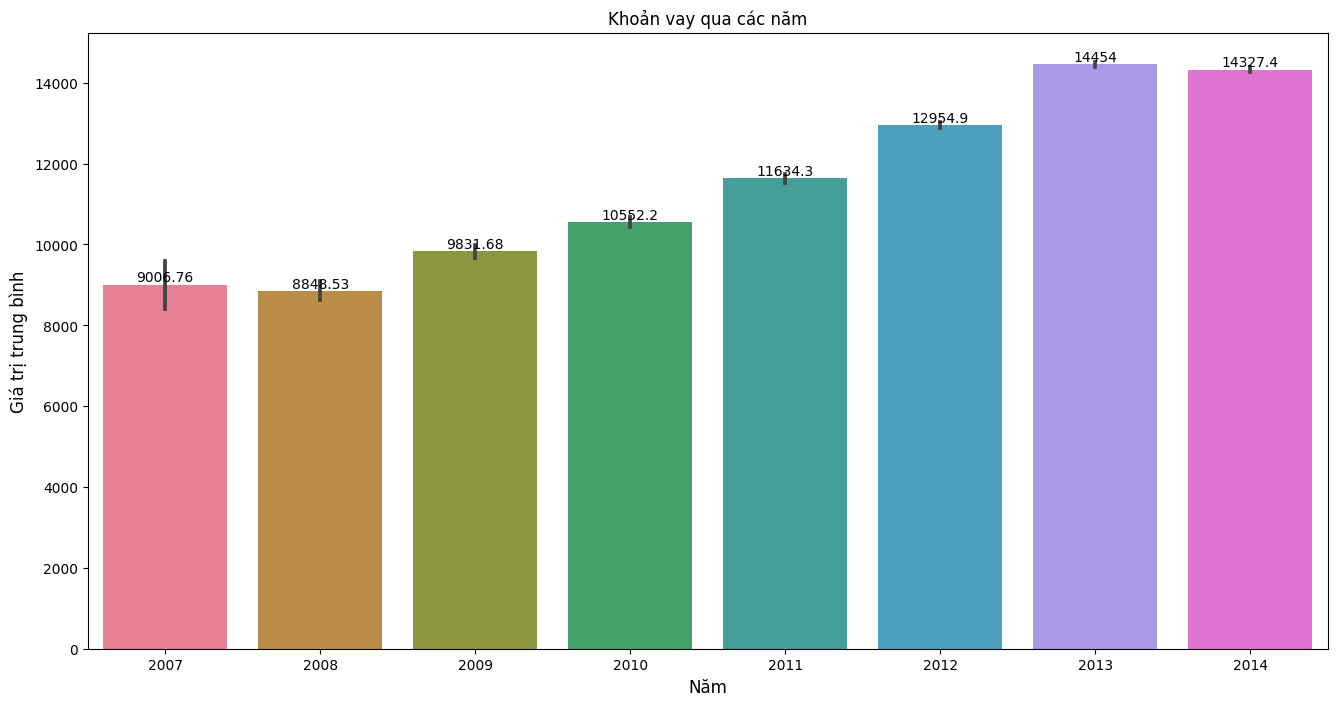

In [73]:
df['year_start'] = df['issue_d'].dt.year

plt.figure(figsize=(16,8))
a = sns.barplot(x= 'year_start', y = 'loan_amnt', data = df, palette='husl')
plt.title('Khoản vay qua các năm', fontsize= 12)
plt.xlabel('Năm', fontsize = 12)
plt.ylabel('Giá trị trung bình', fontsize= 12)
a.bar_label(a.containers[0])
pass

<Axes: xlabel='income_category', ylabel='int_rate'>

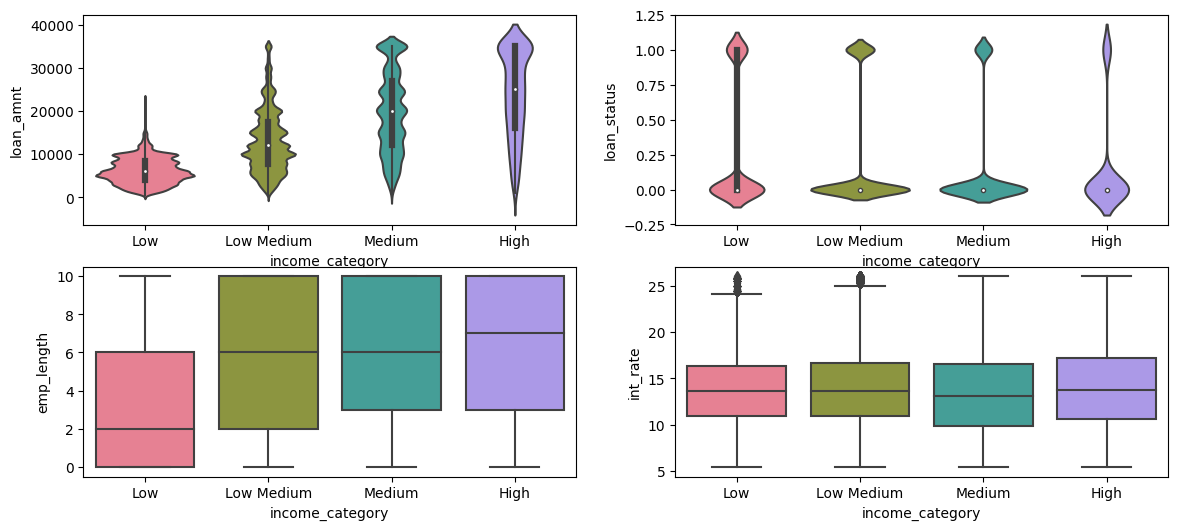

In [74]:
df['income_category'] = np.nan
lst = [df]
df.head()

for col in lst:
    col.loc[col['annual_inc'] <= 30000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 30000) & (col['annual_inc'] <= 100000), 'income_category'] = 'Low Medium'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 3000000), 'income_category'] = 'Medium'
    col.loc[(col['annual_inc'] > 300000) & (col['annual_inc'] <= 7500000), 'income_category'] = 'High'


fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))
sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="husl", ax=ax1 )
sns.violinplot(x="income_category", y="loan_status", data=df, palette="husl", ax=ax2)
sns.boxplot(x="income_category", y="emp_length", data=df,palette="husl",ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="husl", ax=ax4)

#### <span style = 'color: #F9E2AF;'> Nhận xét: </span>
Khoản vay
- Giá trị khoản vay trong thời kỳ xem xét tập trung trong khoảng từ `5000 đến 20000`
- Giá trị khoản vay trung bình `lớn nhất` vào năm 2013 và sau đó là 2014

Thu nhập
- Người ở nhóm thu nhập cao `vay mượn nhiều` hơn nhóm thu nhập thấp và trung bình thấp
- Người ở nhóm thu nhập cao và thấp dễ có `xu hướng trở thành nợ xấu` so với 2 nhóm còn lại
- Cũng dễ hiểu khi người đi vay có thu nhập thấp đồng nghĩa với việc thời gian lao động thấp và ngược lại
- Người ở `thu nhập thấp` có `lãi suất lớn` hơn nhưng cũng thiếu ổn định hơn so với những người ở nhóm thu nhập cao

### <span style = 'color: #F9E2AF;'>Rủi ro về hạng tín dụng và thời gian lao động </span>

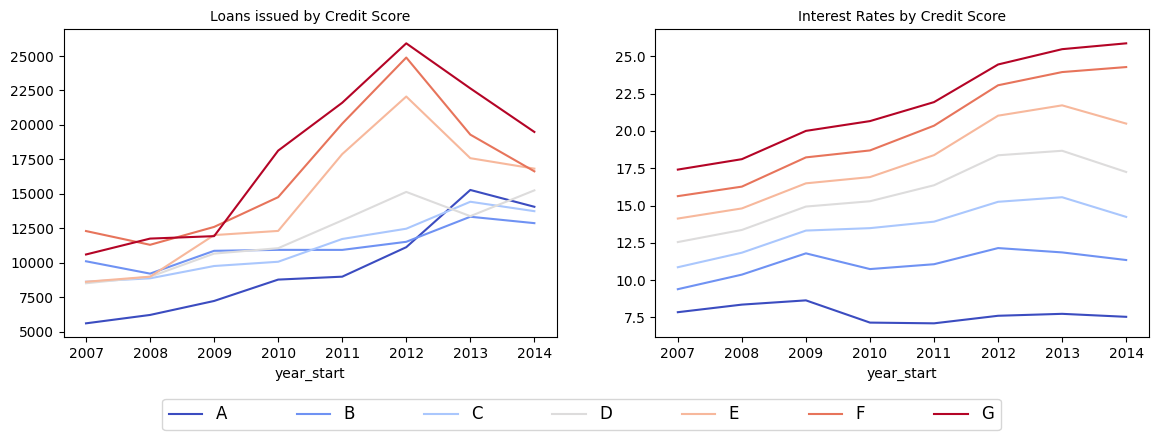

In [75]:
fig, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year_start', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=10)

by_inc = df.groupby(['year_start', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=10)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)


Text(0.5, 1.0, 'Loans status by grade')

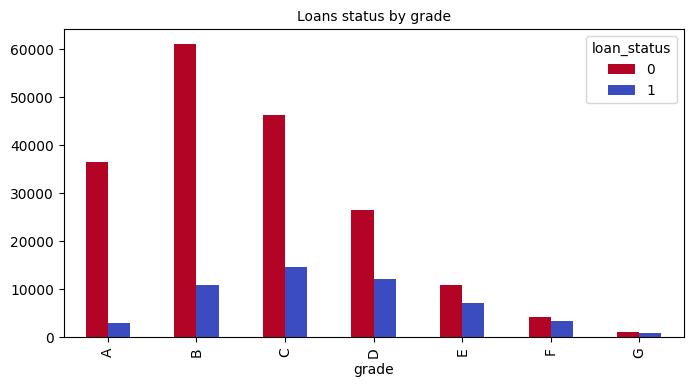

In [76]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

loans_by_grade = df.groupby(['grade', 'loan_status']).size()
loans_by_grade.unstack().plot(kind='bar', stacked= False, colormap=cmap, ax=ax)
ax.set_title('Loans status by grade', fontsize=10)

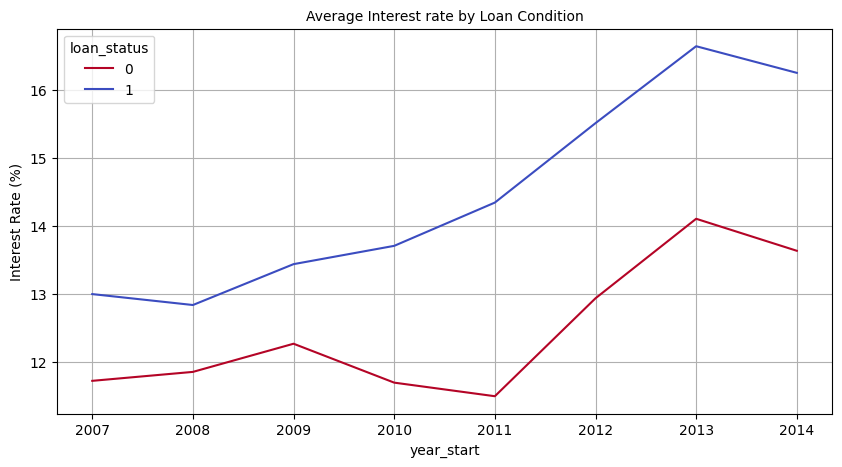

In [77]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

by_int_rate = df.groupby(['year_start', 'loan_status']).int_rate.mean()
by_int_rate.unstack().plot(ax=ax, colormap=cmap)
ax.set_title('Average Interest rate by Loan Condition', fontsize=10)
ax.set_ylabel('Interest Rate (%)', fontsize=10)

plt.grid()

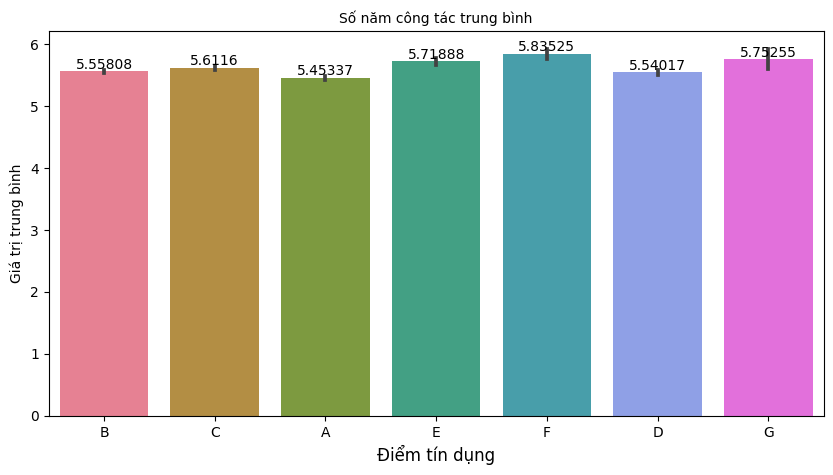

In [78]:
plt.figure(figsize=(10,5))
a = sns.barplot(x= 'grade', y = 'emp_length', data = df, palette='husl')
plt.title('Số năm công tác trung bình', fontsize= 10)
plt.xlabel('Điểm tín dụng', fontsize = 12)
plt.ylabel('Giá trị trung bình', fontsize= 10)
a.bar_label(a.containers[0])
pass

Text(0.5, 1.0, 'Loans status by grade')

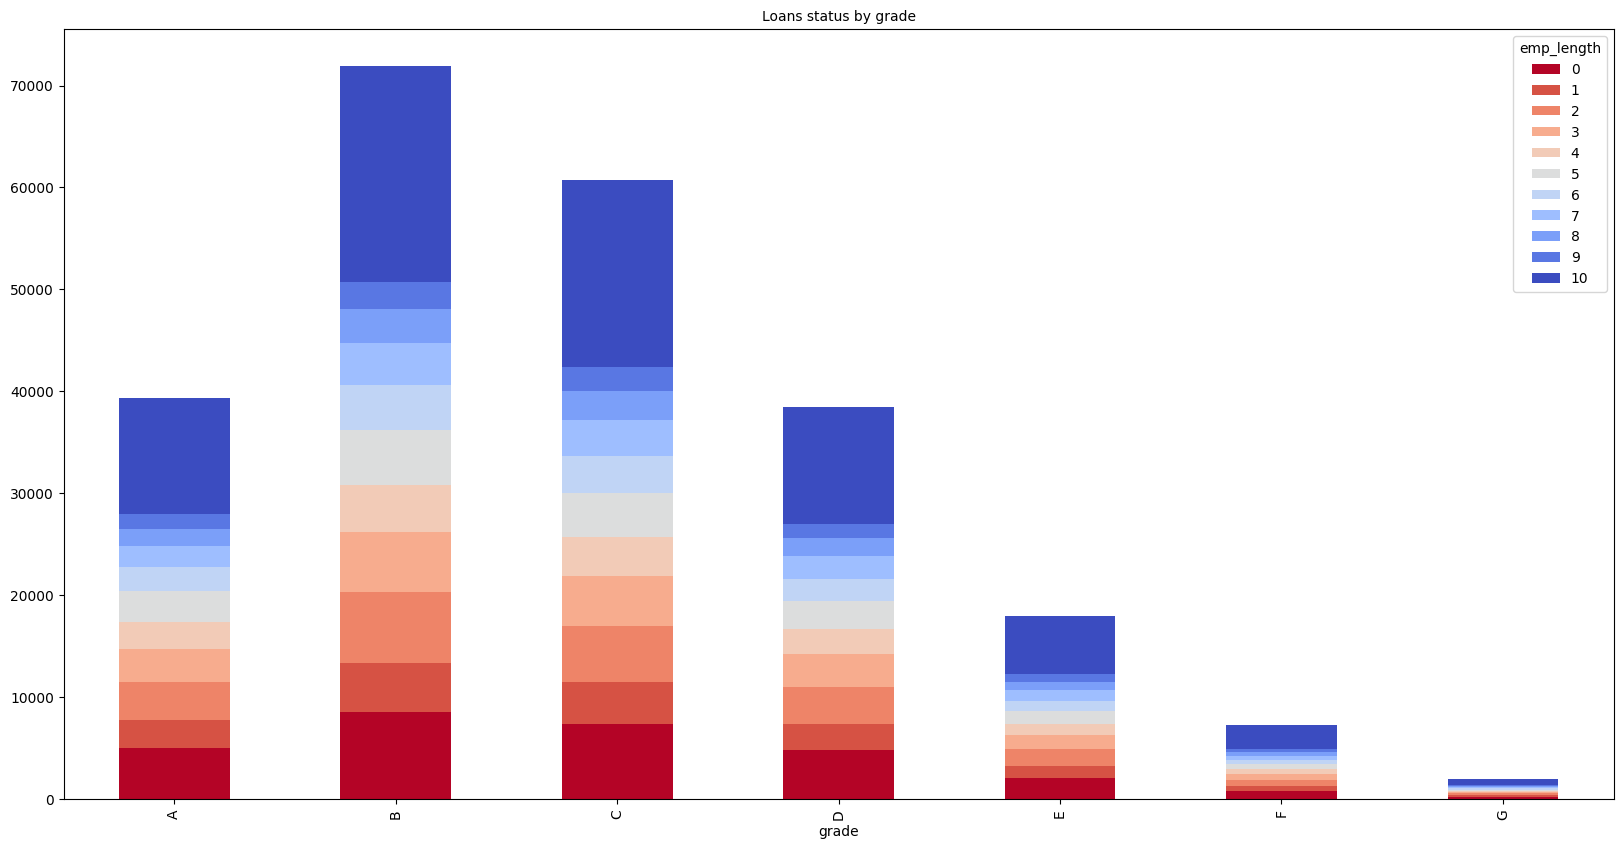

In [79]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
cmap = plt.cm.coolwarm_r

grade_per_emp_length =df.groupby(['grade', 'emp_length']).size()
grade_per_emp_length.unstack().plot(kind='bar', stacked= True, colormap=cmap, ax=ax)
ax.set_title('Loans status by grade', fontsize=10)

#### <span style = 'color: #F9E2AF;'> Nhận xét: </span>
- Người có `grade thấp thì khoản vay và lãi suất cũng cao` 
- Người có `grade cao, lãi suất thấp`
- Lãi suất ổn định trong giai đoạn 2007-2011 ở nhóm tín dụng tốt và đối với nhóm nợ xấu, lãi suất tăng trong giai đoạn dài hơn 2008 -2013
- Nhóm `B,C,D` có khả năng `nợ xấu` là cao nhất nhưng nhóm B cũng là nhóm có số lượng tín dụng đánh giá là tốt cao nhất

Điểm tín dụng
- Số năm công tác công tác trung bình giữa các nhóm là `gần giống nhau`, nằm trong khoảng 5.5 năm thâm niên.
- Nhóm B có số lượng người có thâm niên cao nhất và thấp nhất.
- Điểm được đánh giá chủ yếu rơi vào nhóm `B,C`

### <span style = 'color: #F9E2AF;'> Đặc điểm của nhóm có bị coi là nợ xấu </span>

Text(0, 0.5, 'Count')

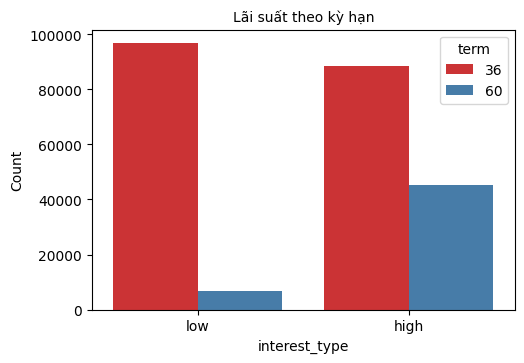

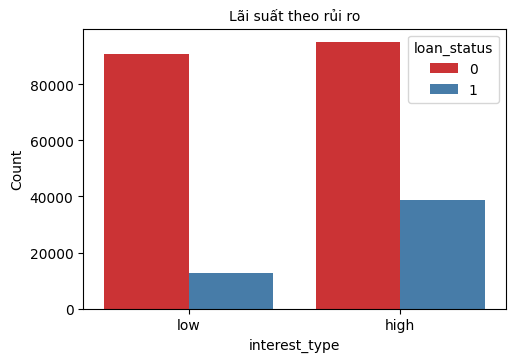

In [80]:
# Giả sử khi lãi suất từ 13% đổ lên thì được coi là nợ xấu
df['interest_type'] = np.nan
lst = [df]
for col in lst:
    col.loc[col['int_rate']< 13, 'interest_type'] = 'low'
    col.loc[col['int_rate']>=13, 'interest_type'] = 'high'

plt.figure(figsize = (12,8))
plt.subplot(221)
ax = sns.countplot(x = 'interest_type', data = df, palette = 'Set1', hue = 'term')
ax.set_title('Lãi suất theo kỳ hạn', fontsize = 10)
ax.set_ylabel('Count', fontsize= 10)


plt.figure(figsize = (12,8))
plt.subplot(222)
ax1 = sns.countplot(x = 'interest_type', data = df,palette = 'Set1', hue = 'loan_status')
ax1.set_title('Lãi suất theo rủi ro', fontsize = 10)
ax1.set_ylabel('Count', fontsize= 10)

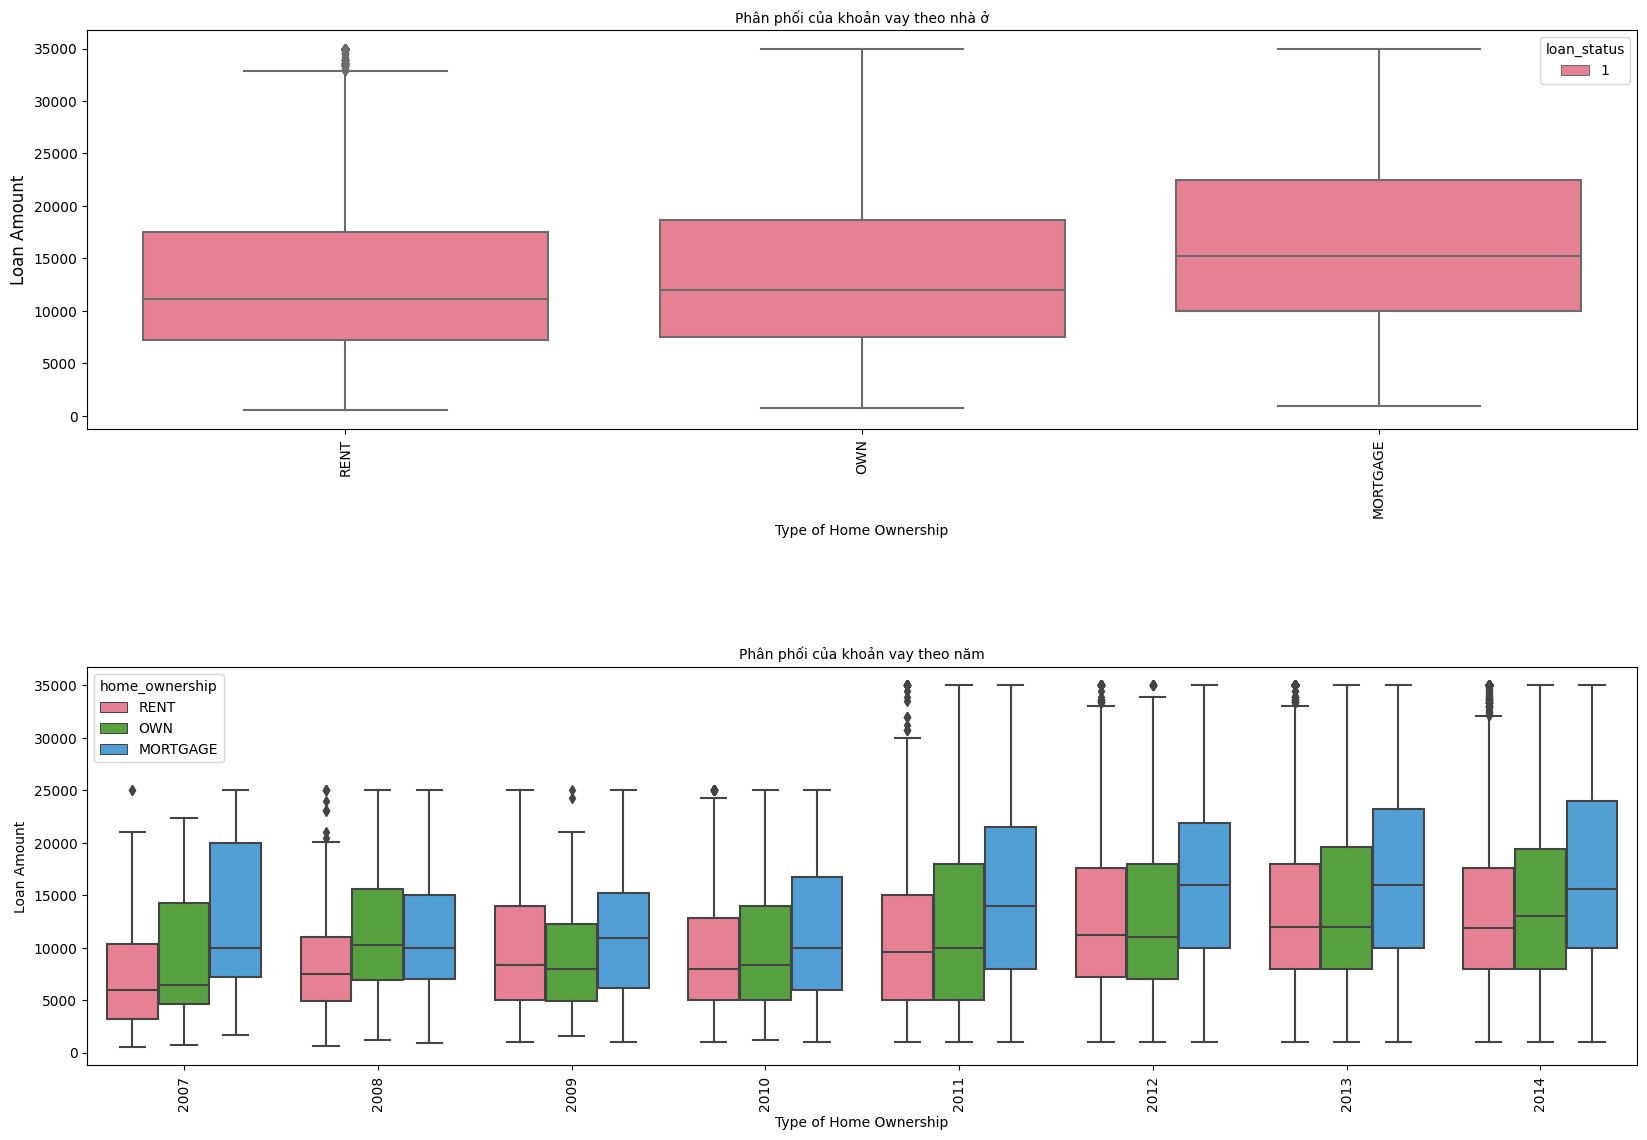

In [81]:

plt.figure(figsize=(20,15))
bad_df = df.loc[df['loan_status'] == 1]

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status',
               data = bad_df, palette = 'husl')

g.set_xticklabels(g.get_xticklabels(),rotation= 90)
g.set_xlabel("Type of Home Ownership", fontsize=10)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Phân phối của khoản vay theo nhà ở", fontsize=10)

plt.subplot(212)
g1 = sns.boxplot(x='year_start', y='loan_amnt', hue='home_ownership',
               data=bad_df, palette="husl")
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel("Type of Home Ownership", fontsize=10)
g1.set_ylabel("Loan Amount", fontsize=10)
g1.set_title("Phân phối của khoản vay theo năm", fontsize= 10)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

#### <span style = 'color: #F9E2AF;'> Nhận xét: </span>
- Nhóm có lãi suất cao dễ bị rủi ro hơn nhóm lãi suất thấp
- Nhóm `kỳ hạn 60 có rủi ro cao hơn`
- Người có tài sản thế chấp dễ đi vay và vay càng cao khả năng là nợ xấu
- Khoản `vay thế chấp` có trung vị ổn định hơn qua các năm và có giá trị vay tăng - được xem xét như dễ bị coi là `nợ xấu`
- Nhóm `thuê nhà` là nhóm vay ít so với các nhóm còn lại và là nhóm nếu vay dễ vay những `khoản tiền lớn (outliers)`


## **<span style = 'color: #CCFFFF;'> Binning, Weight of Evidence (WoE), Information Value (IV) </span>**
#### <span style = 'color: #F9E2AF;'> WoE </span>

- `WOE (weight of evidence)` Phương pháp này sẽ xếp hạng các biến thành mạnh, trung bình, yếu, không tác động,… dựa trên khả năng, sức mạnh dự báo nợ xấu. Tiêu chuẩn xếp hạng sẽ là chỉ số giá trị thông tin IV (information value) được tính toán từ phương pháp WOE. Đồng thời mô hình cũng tạo ra các giá trị features cho mỗi biến. Giá trị này sẽ đo lường sự khác biệt trong phân phối giữa good và bad. Cụ thể như sau:

Phương pháp WOE sẽ có các kĩ thuật xử lý khác biệt đối với biến liên tục và biến phân loại:

- Trường hợp `biến liên tục`, WOE sẽ gán nhãn cho mỗi một quan sát theo nhãn giá trị bins mà nó thuộc về. Các `bins` sẽ là các khoảng liên tiếp được xác định từ biến liên tục sao cho số lượng quan sát ở mỗi bin là bằng nhau. Để xác định các bins thì ta cần xác định số lượng bins. Chúng ta có thể hình dung đầu mút của các khoảng bins chính là các quantile.
- Trường hợp `biến phân loại`, WOE có thể cân nhắc mỗi một class là một bin hoặc có thể nhóm vài nhóm có số lượng quan sát ít vào một bin. Ngoài ra mức độ chênh lệch giữa phân phối good/bad được đo lường thông qua chỉ số WOE cũng có thể được sử dụng để nhận diện các nhóm có cùng tính chất phân loại. Nếu giá trị `WOE của chúng càng gần nhau thì có thể chúng sẽ được nhóm vào một nhóm`. Ngoài ra, trường hợp Null cũng có thể được coi là một nhóm riêng biệt nếu số lượng của nó là đáng kể hoặc nhóm vào các nhóm khác nếu nó là thiểu số.

`Tính chất của WOE`: Giá trị WOE tại một bin càng lớn là dấu hiệu chứng tỏ đặc trưng rất tốt trong việc nhận diện hồ sơ Good và trái lại nếu giá trị WOE càng nhỏ thì đặc trưng bin sẽ rất tốt trong việc nhận diện hồ sơ Bad. WOE > 1 thì phân phối của hồ sơ Good đang chiếm ưu thế hơn Bad và trái lại.

#### <span style = 'color: #F9E2AF;'> Information Value </span>
- <= 0.02: Biến không có tác dụng trong việc phân loại hồ sơ Good/Bad
- 0.02 - 0.1: yếu
- 0.1 - 0.3: trung bình
- 0.3 - 0.5: mạnh
- => 0.5: Biến rất mạnh

Ref : https://phamdinhkhanh.github.io/2020/01/17/ScoreCard.html

In [82]:
df = df.drop(columns = 'index')

In [83]:
df2 = df.drop(columns = ['issue_d','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
                        'year_start', 'income_category','interest_type'])

In [84]:
target = pd.DataFrame(df2['loan_status'])
input = df2.drop(columns = 'loan_status')

In [85]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(df2, target ='loan_status', bins=10)

Information value of loan_amnt is 0.036372
Information value of term is 0.162496
Information value of int_rate is 0.406067
Information value of grade is 0.395751
Information value of emp_length is 0.001736
Information value of home_ownership is 0.013449
Information value of annual_inc is 0.047286
Information value of verification_status is 0.043506
Information value of purpose is 0.025225
Information value of dti is 0.093996
Information value of delinq_2yrs is 0.003856
Information value of inq_last_6mths is 0.012058
Information value of mths_since_last_delinq is 0.001804
Information value of open_acc is 0.004873
Information value of pub_rec is 0.000904
Information value of revol_bal is 0.00573
Information value of revol_util is 0.06352
Information value of total_acc is 0.002891
Information value of initial_list_status is 0.008995
Information value of out_prncp is 0.0
Information value of last_pymnt_amnt is 4.712845
Information value of collections_12_mths_ex_med is 0.001124
Information

In [86]:
# Nhóm lại các đầu vào dữ liệu
selected_iv = iv[(iv['IV']>0.02) & (iv['IV'] <0.5)]
selected_var = list(selected_iv['Variable'].unique())
not_selected_var = [x for x in list(iv['Variable']) if x not in selected_var]

In [87]:
input = input[selected_var]
input_score = input.copy()

In [88]:
woe = woe[(woe['Variable'] == 'loan_amnt') |(woe['Variable'] == 'term')| (woe['Variable'] == 'int_rate') |
          (woe['Variable'] == 'verification_status') |(woe['Variable'] == 'annual_inc') | (woe['Variable'] == 'grade') |
          (woe['Variable'] == 'purpose') | (woe['Variable'] == 'dti') | (woe['Variable'] == 'revol_util') |(woe['Variable'] == 'loan_issue_m')]

In [89]:
# Bining lại dữ liệu 

input['loan_amnt'] = pd.cut(input['loan_amnt'], bins = (499.999, 4725.0, 6250,8000,10000, 12000, 14125,16200,20000, 25000, 35000))
input['int_rate'] = pd.cut(input['int_rate'], bins = (5.419, 7.9, 9.99, 11.49, 12.53, 13.67, 14.61, 15.8, 17.57, 19.52, 26.06))
input['annual_inc'] = pd.cut(input['annual_inc'], bins = (1895.999, 33000, 40442.016, 48000, 55000, 61500, 70000, 80000, 95000, 120000, 7141778))
input['dti'] = pd.cut(input['dti'], bins = (-0.001, 6.4, 9.46, 11.88, 14.03, 16.15, 18.31, 20.62, 23.26, 26.92, 39.99))
input['revol_util'] = pd.cut(input['revol_util'], bins= (-0.001, 20.1, 32.5, 41.6, 49.4, 56.7, 63.7, 70.7, 78.3, 87.1, 100.0))
input['loan_issue_m'] = pd.cut(input['loan_issue_m'], bins = (11.999,16.0, 20.0, 23.0, 26.0, 30.0, 35.0, 39.0, 45.0, 58.0, 100))

In [90]:
for col in list(input.columns):
    key = list(woe['Cutoff'][woe['Variable']==  col])
    value = list(woe['WoE'][woe['Variable']== col])
    d = dict(zip(key, value))
    input[col] = input[col].map(d)

In [91]:
input.head()

,loan_amnt,term,int_rate,grade,annual_inc,verification_status,purpose,dti,revol_util,loan_issue_m
0,-0.218,-0.243,-0.568,-0.440,0.306,0.158,-0.152,0.571,0.211,-0.325
1,-0.258,0.679,0.201,0.132,0.306,0.122,-0.557,-0.475,-0.614,-0.325
2,-0.258,-0.243,0.430,0.132,0.306,-0.305,0.526,-0.364,0.315,-0.325
3,-0.079,-0.243,-0.134,0.132,0.092,0.122,0.135,0.080,-0.306,-0.325
4,-0.218,-0.243,-1.400,-1.241,0.247,0.122,-0.567,-0.255,-0.306,-0.325


## **<span style = 'color: #CCFFFF;'>  Lựa chọn mô hình phân loại và tối ưu hóa </span>**  

In [93]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pd.options.display.float_format = "{:.3f}".format

In [92]:
#Chia train -test data
from sklearn.model_selection import train_test_split
RANDOM_STATE = 50
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = RANDOM_STATE)

#kết quả
print("Variables in Train Set : {} & Test Set : {}".format(len(x_train), len(x_test)))
y_train.value_counts()

Variables in Train Set : 190122 & Test Set : 47531


loan_status
0              148833
1               41289
dtype: int64

In [94]:
DT_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
RF_model= RandomForestClassifier(random_state=RANDOM_STATE,n_jobs=-1)
LR_model= LogisticRegression(random_state=RANDOM_STATE,n_jobs=-1)
XGB_model = XGBClassifier(random_state=RANDOM_STATE, n_jobs=-1)
model = [DT_model, RF_model, LR_model]

In [95]:
for i in range(len(model)):
    kfolds = 4 
    split = KFold(n_splits= kfolds, shuffle=True, random_state=42)
    output = cross_val_score(model[i], x_train, y_train, cv= split, scoring ='accuracy', n_jobs=-1, error_score='raise')

    min_score = round(min(output), 4)
    max_score = round(max(output), 4)
    mean_score = round(np.mean(output), 4)
    std_dev = round(np.std(output), 4)
    
    print(f"{model[i]} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DecisionTreeClassifier(random_state=50) cross validation accuarcy score: 0.6819 +/- 0.0011 (std) min: 0.6803, max: 0.6834, 
RandomForestClassifier(n_jobs=-1, random_state=50) cross validation accuarcy score: 0.7708 +/- 0.0009 (std) min: 0.7693, max: 0.7717, 
LogisticRegression(n_jobs=-1, random_state=50) cross validation accuarcy score: 0.786 +/- 0.0008 (std) min: 0.7846, max: 0.7866, 


LR có sai số nhỏ và accuracy score lớn nhất, lựa chọn `LR làm model chính`

In [96]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#model.fit(x_train, y_train)

x_train_o, y_train_o = make_blobs(n_samples=1000, n_features=10, random_state= RANDOM_STATE)
# define models and parameters
model = LogisticRegression(random_state=RANDOM_STATE,n_jobs=-1)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
multi_class = ['auto', 'ovr']
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values, multi_class = multi_class)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 10, random_state= RANDOM_STATE)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.785926 using {'C': 1.0, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
0.785923 (0.001126) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
0.785924 (0.001124) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
0.785924 (0.001125) with: {'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
0.785923 (0.001126) with: {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
0.785924 (0.001124) with: {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
0.785924 (0.001125) with: {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.785923 (0.001127) with: {'C': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
0.785925 (0.001126) with: {'C': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
0.785924 (0.001126) with: {'C': 10, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
0.785923 (0.001127) wit

In [254]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
# Dự đoán mô hình
model  = LogisticRegression(random_state=RANDOM_STATE,n_jobs=-1, C =1.0, penalty ='l2', solver = 'liblinear', multi_class = 'auto').fit(x_train, y_train)
y_preds = model.predict(x_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     37249
           1       0.56      0.08      0.14     10282

    accuracy                           0.79     47531
   macro avg       0.67      0.53      0.51     47531
weighted avg       0.74      0.79      0.72     47531



In [260]:
#tạo đầu vào cho Roc-auc curve
y_hat_test_proba = model.predict_proba(x_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = x_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
39267,1,0.228,0
15969,1,0.113,0
48832,0,0.107,0
32610,1,0.141,0
95300,0,0.298,0


Hệ số gini của mô hình là 0.41


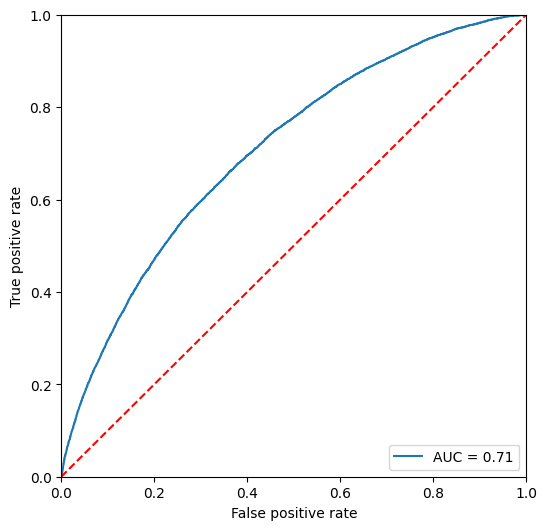

In [261]:
# get the values required to plot a ROC curve
import sklearn.metrics as metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
roc_auc = metrics.auc(fpr, tpr)

# roc_curve n gini
Gini_index = round((2* roc_auc -1),2)
print('Hệ số gini của mô hình là {}'.format(Gini_index))

plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc =  'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


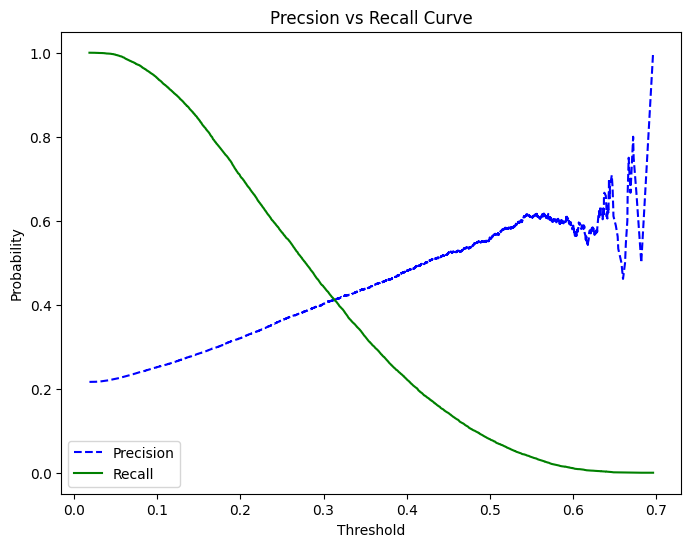

In [249]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_test, y_hat_test_proba)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (8, 6))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

Kiểm định Kolmogorov-Smirnov về phân phối 2 nhóm đầu ra

In [253]:

def _KM(y_pred, n_bins):
  _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
  cmd_BAD = []
  cmd_GOOD = []
  BAD_id = set(np.where(y_test == 0)[0])
  GOOD_id = set(np.where(y_test == 1)[0])
  total_BAD = len(BAD_id)
  total_GOOD = len(GOOD_id)
  for thres in thresholds:
    pred_id = set(np.where(y_pred <= thres)[0])
    # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
    cmd_BAD.append(per_BAD)
    # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
    cmd_GOOD.append(per_GOOD)
  cmd_BAD = np.array(cmd_BAD)
  cmd_GOOD = np.array(cmd_GOOD)
  return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_hat_test_proba, n_bins=20)


from scipy import stats
stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.2857142857142857, pvalue=0.36497950870925666, statistic_location=0.27144524411593074, statistic_sign=-1)

#### <span style = 'color: #CCFFFF;'> Nhận xét </span>
- Accuracy Score = 0.79, tuy vậy precise và recall của `1` rất thấp, trong khi ngược lại đối với `0` thì cao, mô hình có khả năng nhận biết tốt đối với các `khoản vay tốt`
- AUC = 0.71, thể hiện `khả năng phân loại` của mô hình ở mức `tương đối - kém` dựa trên bảng chất lượng.
- `p-value > 0.05` cho thấy phân phối tích lũy giữa tỷ lệ BAD và GOOD là chưa có sự khác biệt nhau. Do đó mô hình có chưa có ý nghĩa trong phân loại hồ sơ.

## **<span style = 'color: #CCFFFF;'> Tính điểm Scorecard </span>**
---
$$
Credit Score = (beta \cdot WOE + \frac{alpha}{n}) \cdot Factor + \frac{Offset}{n}
$$

Note:
- $ Odds =  1:50 $
- $ Base_score = 600 $
- $ pdo \space là\space mức\space điểm\space để \space gấp \space đôi \space odds (mặc \space định = 20) $
- $ Factor = \frac{pdo}{ln(2)} $
- $ Offset = Base_score - Factor \cdot ln(Odds) $

In [100]:
#Tạo hàm tính điểm 
def CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

In [101]:
betas_dict = dict(zip(list(x_train.columns), model.coef_[0]))
alpha = model.intercept_[0]
betas_dict

{'loan_amnt': 0.677875595961974,
 'term': 0.4148335350281861,
 'int_rate': 0.3589434893887847,
 'grade': 0.38950878235755715,
 'annual_inc': 1.416872601976308,
 'verification_status': 0.08248147018969326,
 'purpose': 0.5155147719572979,
 'dti': 0.44076787323262767,
 'revol_util': 0.28818486506944246,
 'loan_issue_m': 0.6486229193375374}

In [102]:
columns = list(woe['Variable'])

beta = []
alpha = model.intercept_[0]
for col in columns:
    beta.append(betas_dict[col])
woe['beta'] = beta

#tính điểm cho mỗi loại dữ liệu
score = CreditScore(beta = woe['beta'], alpha =  alpha, woe = woe['WoE'], n = 10, odds = 1/50, pdo = 20, thres_score = 600)
woe['score'] = score

In [168]:
woe = woe.reset_index(drop = True)

In [246]:
# Giả sử có bộ dữ liệu
test_case = input_score.iloc[5:6, :]
test_case['term'] = test_case['term'].replace(36, '36')

woe['Cutoff'] = woe['Cutoff'].astype('object')
test_case

,loan_amnt,term,int_rate,grade,annual_inc,verification_status,purpose,dti,revol_util,loan_issue_m
5,3000,36,18.640,E,48000.000,Source Verified,car,5.350,87.500,48.000


In [245]:
# Hàm tính toán cho 1 trường dữ liệu
def scoring(obs, col):
    for i in list(woe[woe['Variable'] == col].index):
        if (obs[col].values[0] in woe['Cutoff'][i]) == True:   
            score = round(woe[(woe['Variable'] == col)]['score'][i],3)
            return score
        
scoring(test_case, 'int_rate')

73.419

In [244]:
# Tính tổng điểm cho test_case
def total_score(obs, columns = columns):
    scores = dict()
    for col in columns:
        scores[col] = scoring(obs, col)
    total_score = round(sum(scores.values()), 3)
    return total_score

total_score(test_case, columns = list(test_case.columns))

672.052